In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

In [15]:
# Load the data
data = pd.read_csv('/Users/shada/OneDrive/Documents/sales_data_sample.csv', encoding='latin')

In [16]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [18]:
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [19]:
# Handling missing data (if any)
data = data.dropna() 

In [20]:
data.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [21]:
# Data Analysis
sales_by_month = data.groupby('MONTH_ID')['SALES'].sum()
sales_by_year = data.groupby('YEAR_ID')['SALES'].sum()
sales_by_country = data.groupby('COUNTRY')['SALES'].sum()

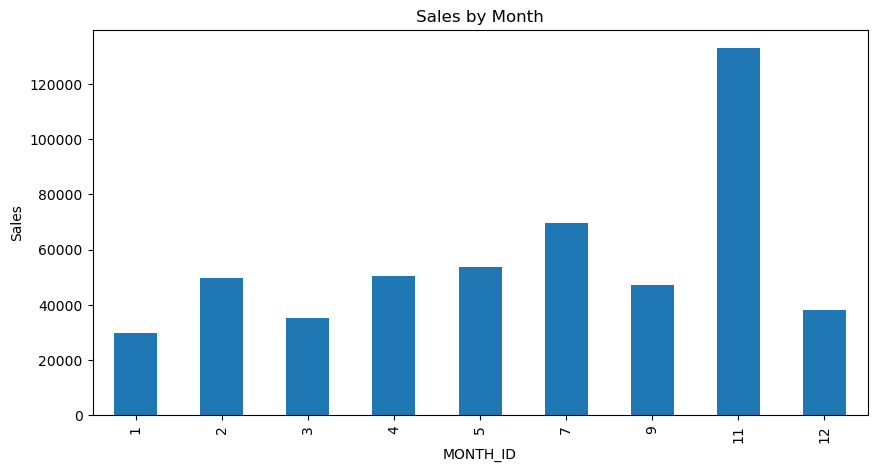

In [22]:
# Visualization
plt.figure(figsize=(10,5))
sales_by_month.plot(kind='bar')
plt.title('Sales by Month')
plt.ylabel('Sales')
plt.show()

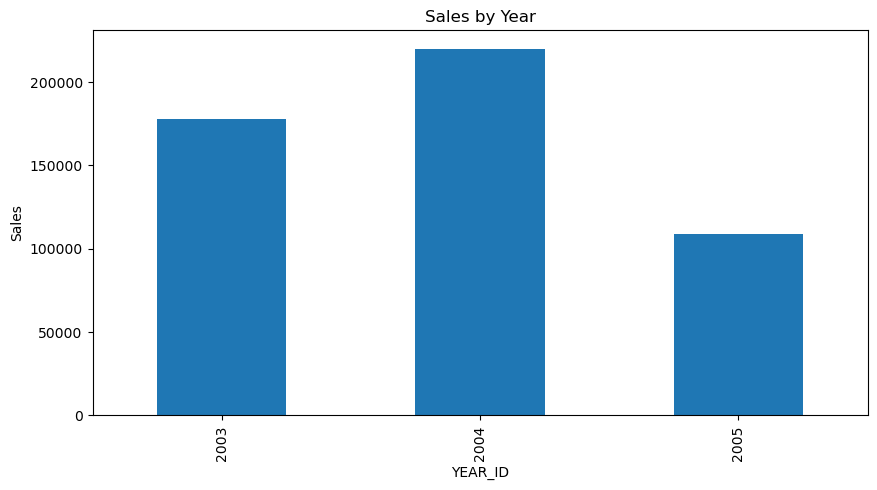

In [23]:
plt.figure(figsize=(10,5))
sales_by_year.plot(kind='bar')
plt.title('Sales by Year')
plt.ylabel('Sales')
plt.show()

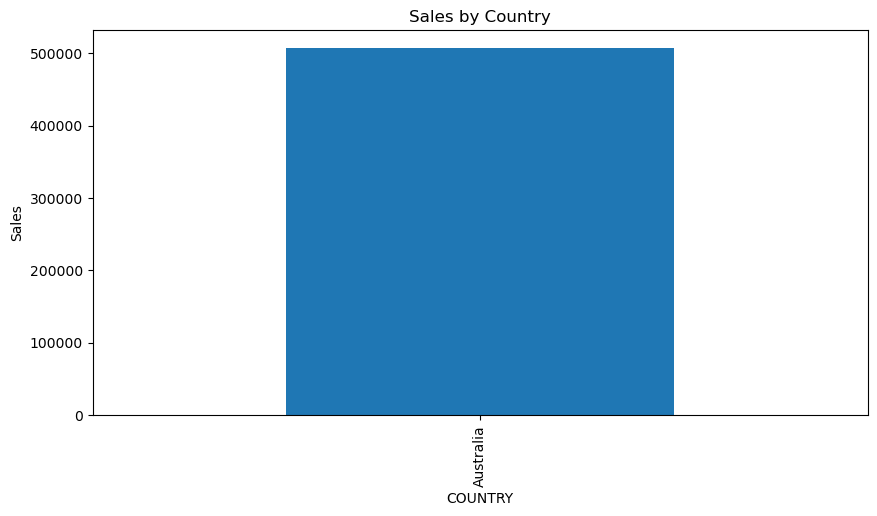

In [24]:
plt.figure(figsize=(10,5))
sales_by_country.plot(kind='bar')
plt.title('Sales by Country')
plt.ylabel('Sales')
plt.show()

                 ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
ORDERNUMBER         1.000000         0.085820  -0.118828        -0.065534   
QUANTITYORDERED     0.085820         1.000000  -0.045836        -0.004709   
PRICEEACH          -0.118828        -0.045836   1.000000        -0.057407   
ORDERLINENUMBER    -0.065534        -0.004709  -0.057407         1.000000   
SALES              -0.000128         0.496692   0.659209        -0.103839   
QTR_ID             -0.034468         0.021219   0.006008         0.009657   
MONTH_ID            0.021950         0.009975  -0.011363         0.024107   
YEAR_ID             0.914446         0.071369  -0.104100        -0.073165   
MSRP               -0.047630        -0.028617   0.497117        -0.104329   

                    SALES    QTR_ID  MONTH_ID   YEAR_ID      MSRP  
ORDERNUMBER     -0.000128 -0.034468  0.021950  0.914446 -0.047630  
QUANTITYORDERED  0.496692  0.021219  0.009975  0.071369 -0.028617  
PRICEEACH        0.659209

C:\Users\shada\AppData\Local\Temp\ipykernel_13104\2099553513.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

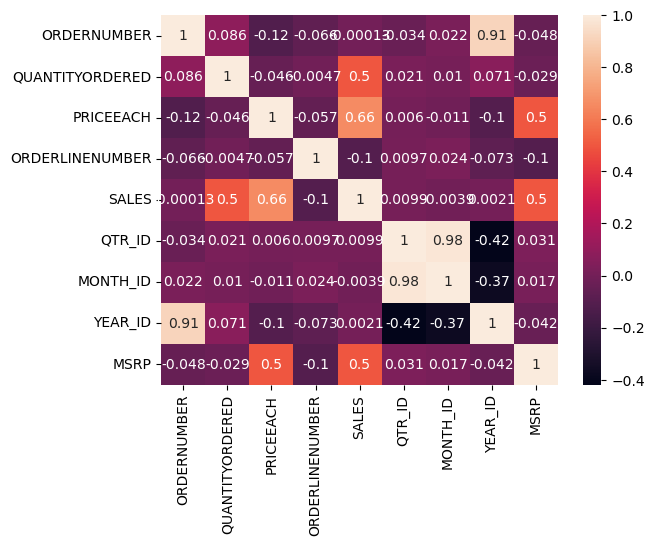

In [25]:
# Correlation matrix
corr = data.corr()
print(corr)
sns.heatmap(corr, annot=True)

In [26]:
# Predictive Modeling (Simple Linear Regression for the sake of example)
# Let's say we want to predict 'SALES' based on 'PRICEEACH'

X = data['PRICEEACH'].values.reshape(-1,1)
y = data['SALES'].values.reshape(-1,1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)


     Actual    Predicted
0   1329.90  1581.080763
1   2467.90  3477.288996
2   3254.72  4309.498206
3   2475.27  4309.498206
4   1747.20  2477.520885
5   3528.36  4309.498206
6   1694.00   874.540730
7   2083.20  1494.508664
8    652.35  1153.247035
9   6454.40  4309.498206
10  4977.00  4309.498206
11  2567.84  1983.780656
12  3866.40  3223.157996
13  5029.50  4309.498206
14  2598.82  2543.985916
15  3608.76  4309.498206
16  3586.43  4309.498206
17  4814.40  4309.498206
18  1545.60  2834.979875
19  9264.86  4309.498206
20  2233.69  2096.045120
21  3160.74  4309.498206
22  4277.35  4309.498206
23  1506.50  2089.901294
24  2743.04  3511.917836
25  5848.68  4309.498206
26  5001.92  4309.498206
27  4651.53  4309.498206
28  2078.28  1948.593287
29  1707.14  1528.578974


In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 870.3595711685987
Mean Squared Error: 1568871.6791827807
Root Mean Squared Error: 1252.546078666482


In [29]:
# Decision Tree
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

tree_y_pred = tree_reg.predict(X_test)

tree_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': tree_y_pred.flatten()})
print(tree_df)

     Actual   Predicted
0   1329.90  2480.38000
1   2467.90  2479.21000
2   3254.72  4527.05069
3   2475.27  4527.05069
4   1747.20  1668.50000
5   3528.36  4527.05069
6   1694.00  1035.58000
7   2083.20  2480.38000
8    652.35  2113.37000
9   6454.40  4527.05069
10  4977.00  4527.05069
11  2567.84  2674.90000
12  3866.40  2356.25000
13  5029.50  4527.05069
14  2598.82  2633.78000
15  3608.76  4527.05069
16  3586.43  4527.05069
17  4814.40  4527.05069
18  1545.60  2282.22000
19  9264.86  4527.05069
20  2233.69  1210.80000
21  3160.74  4527.05069
22  4277.35  4527.05069
23  1506.50  1210.80000
24  2743.04  2479.21000
25  5848.68  4527.05069
26  5001.92  4527.05069
27  4651.53  4527.05069
28  2078.28  1668.37000
29  1707.14  2480.38000


In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, tree_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, tree_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, tree_y_pred)))

Mean Absolute Error: 884.5026436781611
Mean Squared Error: 1601025.9951777093
Root Mean Squared Error: 1265.3165592758633


In [31]:
# Random Forest
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train.ravel())

forest_y_pred = forest_reg.predict(X_test)

forest_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': forest_y_pred.flatten()})
print(forest_df)

     Actual    Predicted
0   1329.90  2189.478000
1   2467.90  2627.599800
2   3254.72  4541.006232
3   2475.27  4541.006232
4   1747.20  1779.500900
5   3528.36  4541.006232
6   1694.00  1240.969700
7   2083.20  2191.776600
8    652.35  1879.840800
9   6454.40  4541.006232
10  4977.00  4541.006232
11  2567.84  2266.317400
12  3866.40  2843.398000
13  5029.50  4541.006232
14  2598.82  2306.806500
15  3608.76  4541.006232
16  3586.43  4541.006232
17  4814.40  4541.006232
18  1545.60  2386.470100
19  9264.86  4541.006232
20  2233.69  1336.489200
21  3160.74  4541.006232
22  4277.35  4541.006232
23  1506.50  1336.489200
24  2743.04  2722.018200
25  5848.68  4541.006232
26  5001.92  4541.006232
27  4651.53  4541.006232
28  2078.28  1954.284800
29  1707.14  2191.776600


In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, forest_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, forest_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, forest_y_pred)))

Mean Absolute Error: 820.1534522666112
Mean Squared Error: 1487324.1412179633
Root Mean Squared Error: 1219.5589945623638
